## Open netCDF file

In [1]:
%pwd

'/src/notebook'

In [63]:
import os
import numpy as np
from osgeo import gdal, osr

In [32]:
path_local = 'data/NC_H08_20160714_0000_r14_FLDK.02701_02601.nc'
os.path.exists(path_file)

True

In [33]:
hdf_ds = gdal.Open(path_local)
try:
    sub_datasets = hdf_ds.GetSubDatasets()
except AttributeError:
    print("can't open sub datasets by GDAL \n {}".format(path_local))

In [34]:
sub_datasets

[('NETCDF:"data/NC_H08_20160714_0000_r14_FLDK.02701_02601.nc":albedo_01',
  '[2601x2701] albedo_01 (16-bit integer)'),
 ('NETCDF:"data/NC_H08_20160714_0000_r14_FLDK.02701_02601.nc":albedo_02',
  '[2601x2701] albedo_02 (16-bit integer)'),
 ('NETCDF:"data/NC_H08_20160714_0000_r14_FLDK.02701_02601.nc":albedo_03',
  '[2601x2701] albedo_03 (16-bit integer)'),
 ('NETCDF:"data/NC_H08_20160714_0000_r14_FLDK.02701_02601.nc":sd_albedo_03',
  '[2601x2701] sd_albedo_03 (16-bit integer)'),
 ('NETCDF:"data/NC_H08_20160714_0000_r14_FLDK.02701_02601.nc":albedo_04',
  '[2601x2701] albedo_04 (16-bit integer)'),
 ('NETCDF:"data/NC_H08_20160714_0000_r14_FLDK.02701_02601.nc":albedo_05',
  '[2601x2701] albedo_05 (16-bit integer)'),
 ('NETCDF:"data/NC_H08_20160714_0000_r14_FLDK.02701_02601.nc":albedo_06',
  '[2601x2701] albedo_06 (16-bit integer)'),
 ('NETCDF:"data/NC_H08_20160714_0000_r14_FLDK.02701_02601.nc":tbb_07',
  '[2601x2701] tbb_07 (16-bit integer)'),
 ('NETCDF:"data/NC_H08_20160714_0000_r14_FLDK.02

In [35]:
dict_meta = hdf_ds.GetMetadata()
dict_meta

{'NC_GLOBAL#band_number': '9',
 'NC_GLOBAL#date_created': '2016-10-21T20:12:16Z',
 'NC_GLOBAL#grid_interval': '0.0099999998',
 'NC_GLOBAL#id': 'NC_H08_20160714_0000_r14_FLDK.02701_02601.nc',
 'NC_GLOBAL#line_number': '2601',
 'NC_GLOBAL#pixel_number': '2701',
 'NC_GLOBAL#title': 'Himawari-8 AHI equal latitude-longitude map data',
 'NC_GLOBAL#upper_left_latitude': '50',
 'NC_GLOBAL#upper_left_longitude': '123'}

In [36]:
list_band = [dataset[0].split(':')[-1] for dataset in sub_datasets]
list_band

['albedo_01',
 'albedo_02',
 'albedo_03',
 'sd_albedo_03',
 'albedo_04',
 'albedo_05',
 'albedo_06',
 'tbb_07',
 'tbb_14',
 'tbb_15',
 'SAZ',
 'SAA',
 'SOZ',
 'SOA',
 'Hour']

In [90]:
name = ['tbb_14', 'albedo_01']
[i for i, band in enumerate(list_band) if band in name]

[0, 8]

In [89]:
name = 'tbb_14'
index = [i for i, band in enumerate(list_band) if band==name][0]
print(index)

8


In [51]:
dataset = sub_datasets[index]
band_ds = gdal.Open(dataset[0], gdal.GA_ReadOnly)
band_ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fb5d88905d0> >

In [16]:
# dict_meta_sub = self._get_meta_data(dataset, dict_meta)
# head = dict_meta_sub.get('head', None)

In [18]:
# list_band = [dataset[0].split(':')[-1] for dataset in sub_datasets]
# list_index = _get_filtered_list(list_band, list_band_filter)
# print(list_band)
# print(list_index)

TypeError: _get_filtered_list() missing 1 required positional argument: 'list_band_filter'

In [73]:
band_array = band_ds.ReadAsArray()
data_type = band_array.dtype.name

In [74]:
band_array.shape, data_type

((2601, 2701), 'int16')

In [75]:
band_ds.GetMetadata()

{'latitude#long_name': 'latitude',
 'latitude#units': 'degrees_north',
 'longitude#long_name': 'longitude',
 'longitude#units': 'degrees_east',
 'NC_GLOBAL#band_number': '9',
 'NC_GLOBAL#date_created': '2016-10-21T20:12:16Z',
 'NC_GLOBAL#grid_interval': '0.0099999998',
 'NC_GLOBAL#id': 'NC_H08_20160714_0000_r14_FLDK.02701_02601.nc',
 'NC_GLOBAL#line_number': '2601',
 'NC_GLOBAL#pixel_number': '2701',
 'NC_GLOBAL#title': 'Himawari-8 AHI equal latitude-longitude map data',
 'NC_GLOBAL#upper_left_latitude': '50',
 'NC_GLOBAL#upper_left_longitude': '123',
 'tbb_14#add_offset': '273.14999',
 'tbb_14#long_name': 'Brightness temperature of band 14',
 'tbb_14#missing_value': '-32768',
 'tbb_14#scale_factor': '0.0099999998',
 'tbb_14#units': 'K',
 'tbb_14#valid_max': '32767',
 'tbb_14#valid_min': '-27315'}

In [76]:
band_ds.GetDescription()

'NETCDF:"data/NC_H08_20160714_0000_r14_FLDK.02701_02601.nc":tbb_14'

In [91]:
band_ds.RasterYSize * -1

-2601

In [78]:
ESPG_GRID = 4326

In [79]:
band_array = np.flipud(band_array.T)
espg_grid = ESPG_GRID
srs = osr.SpatialReference()
srs.ImportFromEPSG(espg_grid)

0

In [80]:
# projection data
tup_transform = (123.0, 0.0099999998, 0.0, 50.0, 0.0, -0.0099999998)

In [81]:
DICT_GDT = {
    'uint16': gdal.GDT_UInt16,
    'uint8': gdal.GDT_Byte,
    'complex64': gdal.GDT_CFloat64,
    'float32': gdal.GDT_Float32,
    'float64': gdal.GDT_Float64,
    'int16': gdal.GDT_Int16,
    'int32': gdal.GDT_Int32,
    'uint32': gdal.GDT_UInt32,
}

In [82]:
band_array.shape, band_ds.RasterYSize, band_ds.RasterXSize

((2701, 2601), 2601, 2701)

In [83]:
# set filename and path
filename_grid = os.path.splitext(os.path.basename(path_local))[0]+ '_' + str(ESPG_GRID) + '.tif'
path_grid = os.path.join('data/', filename_grid)

# convert to sinusoidal and save it
out_ds = gdal.GetDriverByName('GTiff').Create(path_grid,
                                              band_ds.RasterYSize,
                                              band_ds.RasterXSize,
                                              1,  # Number of bands
                                              DICT_GDT.get(data_type, gdal.GDT_Unknown),
                                              ['TILED=YES'])
out_ds.SetGeoTransform(tup_transform)
out_ds.SetProjection(srs.ExportToWkt())
out_ds.GetRasterBand(1).WriteArray(band_array)
out_ds.FlushCache()
out_ds = None

In [86]:
import rasterio
from rasterio.plot import show

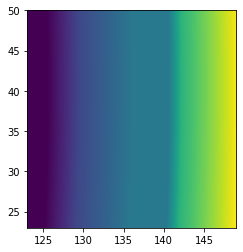

In [118]:
path_grid = 'data/NC_H08_20160714_0000_r14_FLDK.02701_02601_Hour_4326.tif'
src = rasterio.open(path_grid)
show(src);

In [121]:
src.meta

{'driver': 'GTiff',
 'dtype': 'int16',
 'nodata': -32768.0,
 'width': 2601,
 'height': 2701,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.0099999998, 0.0, 123.0,
        0.0, -0.0099999998, 50.0)}

In [122]:
src.scales

(9.9999997e-05,)

In [123]:
src.units

('hours',)

In [124]:
src.descriptions

('observation hours (UT)',)

In [125]:
src.offsets

(0.0045836223,)

In [126]:
src.nodata

-32768.0

In [127]:
with rasterio.open(path_grid, 'r+') as src:
    src.nodata = -32768